In [52]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [70]:
iris = load_iris()
print(iris.keys())
print(iris['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [54]:
x = pd.DataFrame(data = iris.data, columns = iris.feature_names)
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [55]:
y = pd.DataFrame(data = iris.target, columns = ["iris_type"])
y.head(10)

,iris_type
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [74]:
print(y.iris_type.value_counts())
iris.target_names

0    50
1    50
2    50
Name: iris_type, dtype: int64


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


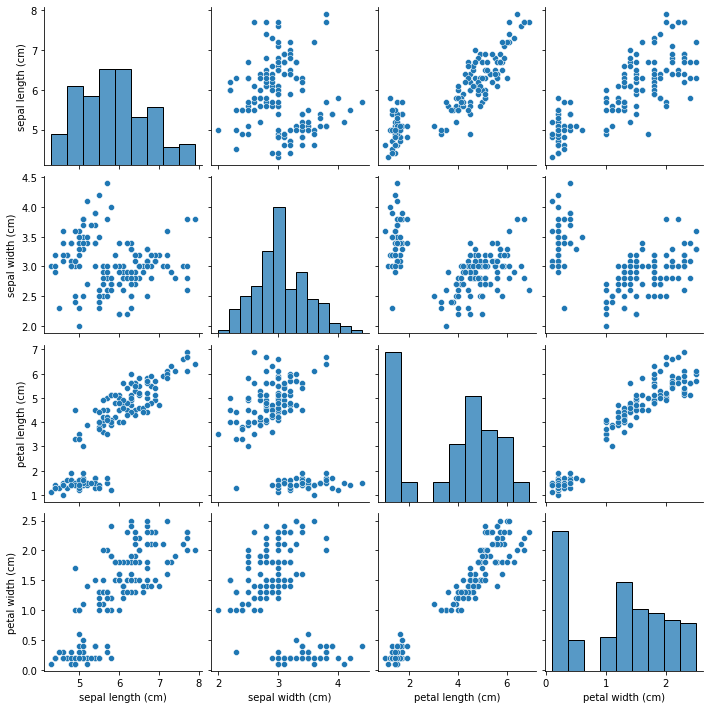

In [76]:
print(x.info())
sns.pairplot(x)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(135, 4) (15, 4)
(135, 1) (15, 1)


In [82]:
X_train.var(), X_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64,
 sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [83]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train[:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [61]:
X_train = X_train.values
X_test = X_test.values
X_train[0]

array([6.3, 3.3, 4.7, 1.6])

In [62]:
model = Sequential()
model.add(Dense(64, activation ='relu', input_shape = X_train[0].shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [63]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 7, validation_split = 0.1)

Epoch 1/7
1/4 [======>.......................] - ETA: 0s - loss: 1.1008 - accuracy: 0.3438

2022-02-05 17:03:41.883120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-05 17:03:42.056066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 41ms/step - loss: 1.0095 - accuracy: 0.5289 - val_loss: 0.9273 - val_accuracy: 0.6429
Epoch 2/7
4/4 [==============================] - 0s 13ms/step - loss: 0.8573 - accuracy: 0.6777 - val_loss: 0.8219 - val_accuracy: 0.6429
Epoch 3/7
4/4 [==============================] - 0s 13ms/step - loss: 0.7486 - accuracy: 0.6777 - val_loss: 0.7247 - val_accuracy: 0.6429
Epoch 4/7
4/4 [==============================] - 0s 13ms/step - loss: 0.6425 - accuracy: 0.7355 - val_loss: 0.6205 - val_accuracy: 0.7857
Epoch 5/7
4/4 [==============================] - 0s 13ms/step - loss: 0.5461 - accuracy: 0.7686 - val_loss: 0.5328 - val_accuracy: 0.9286
Epoch 6/7
4/4 [==============================] - 0s 13ms/step - loss: 0.4634 - accuracy: 0.8760 - val_loss: 0.4756 - val_accuracy: 0.9286
Epoch 7/7
4/4 [==============================] - 0s 13ms/step - loss: 0.4083 - accuracy: 0.9587 - val_loss: 0.3946 - val_accuracy: 1.0000


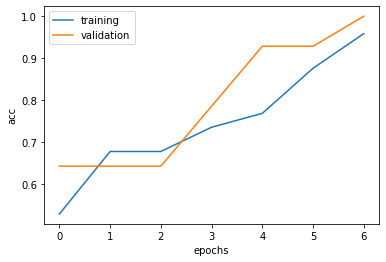

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['training', 'validation'])
pass

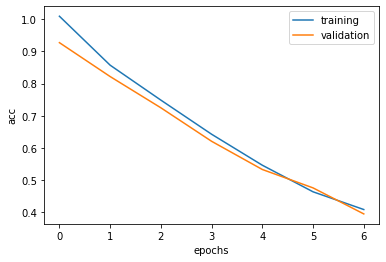

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['training', 'validation'])
pass

In [66]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.3964 - accuracy: 0.9333


[0.39644452929496765, 0.9333333969116211]